In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [2]:
pdg_train = np.abs(np.load('trainpdg.npy'))
pdg_test = np.abs(np.load('testpdg.npy'))

In [3]:
len(pdg_train)

117318

# Training data sets

In [4]:
trainangles = np.load('trainangles.npy', allow_pickle = True)
trainenergy = np.load('trainenergies.npy', allow_pickle = True)
trainbinfrac = np.load('trainbinfrac.npy', allow_pickle = True)
trainrsq = np.load('trainrsquare.npy', allow_pickle = True)
trainisTrack = np.load('trainisTrack.npy')

In [5]:
x_train = np.array(list(zip(trainangles, trainbinfrac, trainenergy, trainrsq)))

In [6]:
x_train

array([[14.31261616,  0.20238095,  0.18191113,  0.99312023],
       [ 1.51185943,  0.20512821,  0.23647127,  0.97985841],
       [ 5.77915535,  0.20588235,  0.28685775,  0.99722832],
       ...,
       [ 2.36683276,  0.22028986,  0.21082538,  0.99921892],
       [ 2.46280738,  0.20036101,  0.19711588,  0.99943964],
       [ 3.43693059,  0.21428571,  0.19193022,  0.99883645]])

In [7]:
y_train = trainisTrack

In [8]:
len(y_train)

117318

# Create and train BDT

In [9]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [10]:
bdt.score(x_train, y_train)

0.9428305971803134

# Testing data sets

In [11]:
testangles = np.load('testangles.npy', allow_pickle = True)
testenergy = np.load('testenergies - Copy.npy', allow_pickle = True)
testbinfrac = np.load('testbinfrac.npy', allow_pickle = True)
testrsq = np.load('testrsquare.npy', allow_pickle = True)
testisTrack = np.load('testisTrack.npy')

In [12]:
x_test = np.array(list(zip(testangles, testbinfrac, testenergy, testrsq)))

In [13]:
y_test = testisTrack

# Create and test BDT

In [14]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [15]:
bdt.score(x_test, y_test)

0.9421274008006892

# Angle and bin fraction

In [16]:
cls_0_train = np.where(y_train == 0)[0]
cls_1_train = np.where(y_train == 1)[0]
cls_0_test = np.where(y_test == 0)[0]
cls_1_test = np.where(y_test == 1)[0]

In [17]:
# Get the class predictions for the training set
pred_bin_angle_train = bdt.predict(x_train)

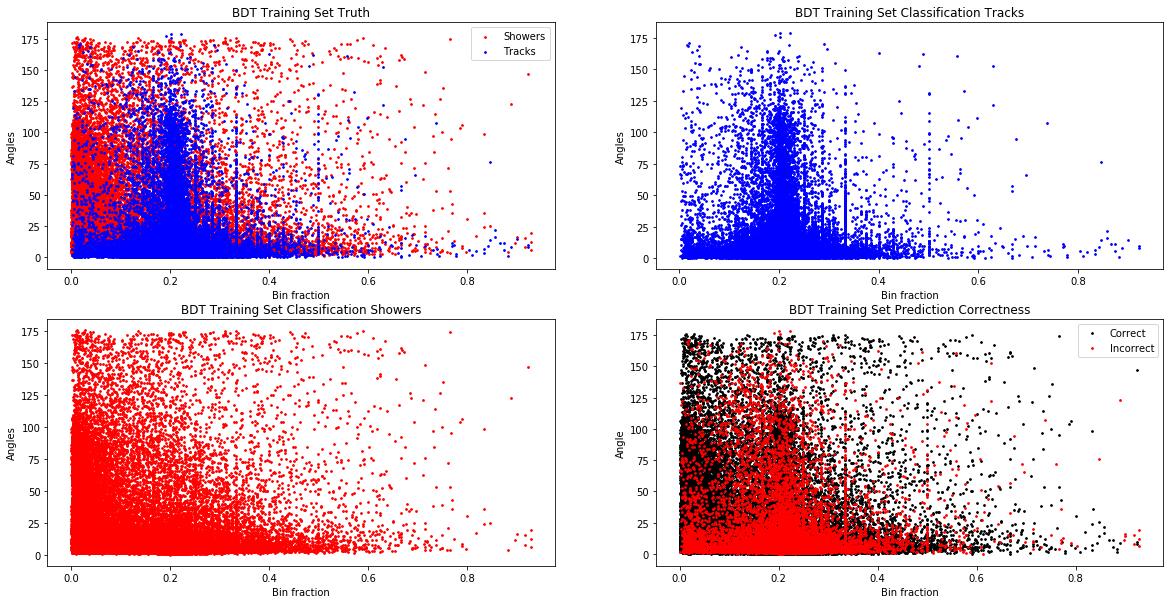

In [18]:
fig = plt.figure(1, figsize = (20,10))

plt.subplot(2, 2, 1)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Training Set Truth')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Training Set Classification Tracks')

plt.subplot(2, 2, 3)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Training Set Classification Showers')

plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_angle_train == y_train)
plt.scatter(x_train[cls_0, 1], x_train[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_angle_train != y_train)
plt.scatter(x_train[cls_1, 1], x_train[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angle")
plt.title("BDT Training Set Prediction Correctness")
plt.legend()

plt.show()

In [19]:
pred_bin_angle_test = bdt.predict(x_test)

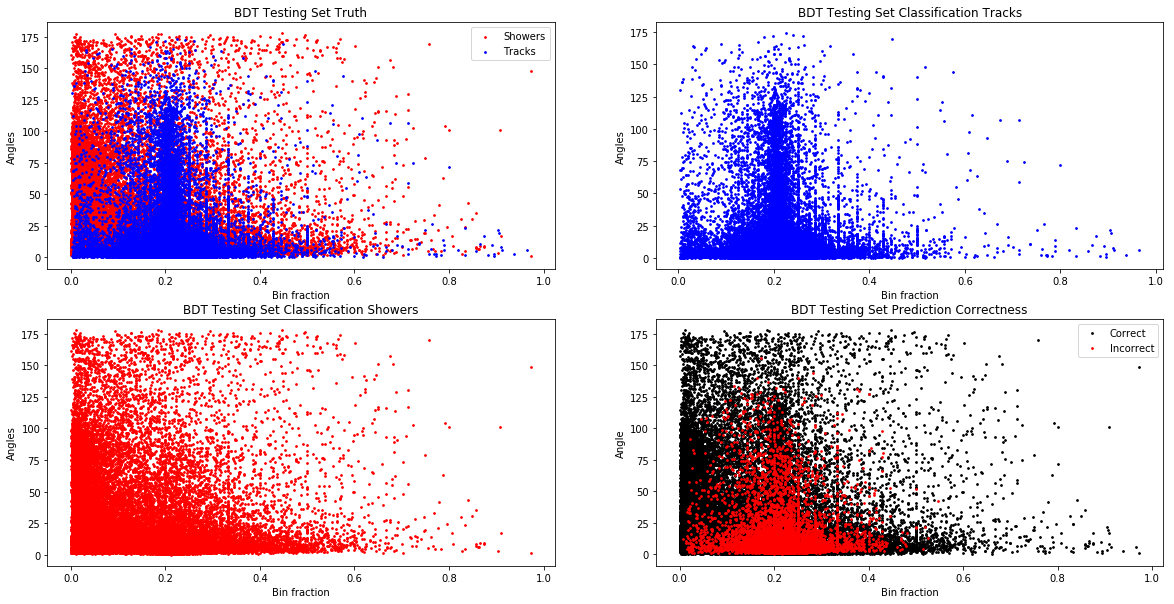

In [20]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Testing Set Truth')
plt.legend()


plt.subplot(2, 2, 2)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Testing Set Classification Tracks')


plt.subplot(2, 2, 3)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angles")
plt.title('BDT Testing Set Classification Showers')


plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_angle_test == y_test)
plt.scatter(x_test[cls_0, 1], x_test[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_angle_test != y_test)
plt.scatter(x_test[cls_1, 1], x_test[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Angle")
plt.title("BDT Testing Set Prediction Correctness")
plt.legend()
plt.show()

# Energy fraction and bin fraction

In [21]:
pred_bin_energy_train = bdt.predict(x_train)

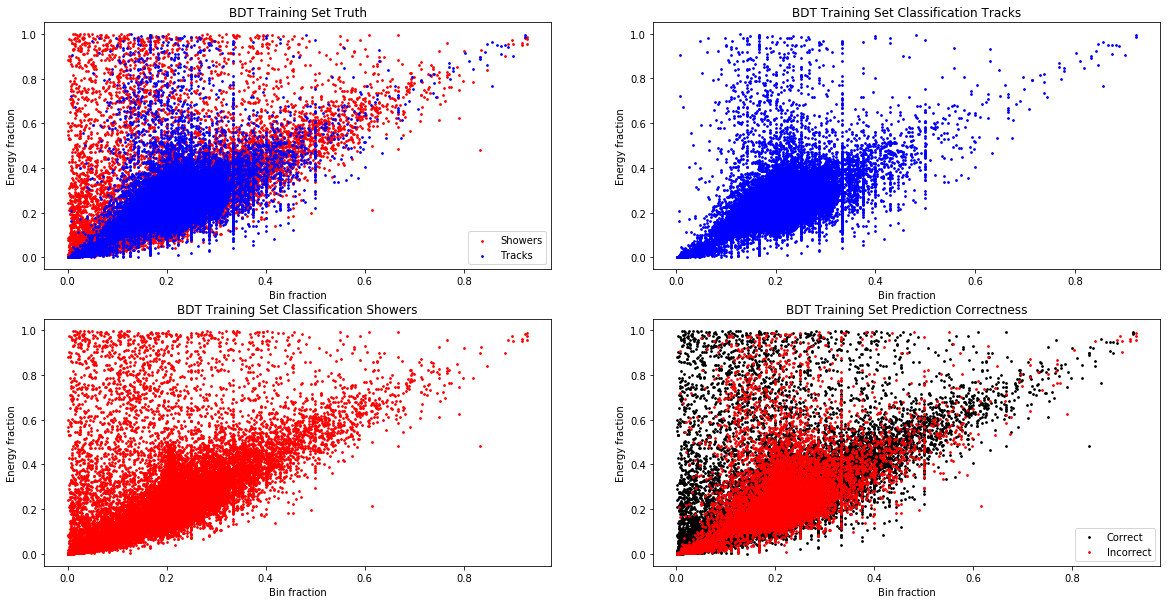

In [22]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 2], c="r", label="Showers", s=3)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 2], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Training Set Truth')
plt.legend()



plt.subplot(2, 2, 2)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 2], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Training Set Classification Tracks')



plt.subplot(2, 2, 3)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 2], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Training Set Classification Showers')



plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_energy_train == y_train)
plt.scatter(x_train[cls_0, 1], x_train[cls_0, 2], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_energy_train != y_train)
plt.scatter(x_train[cls_1, 1], x_train[cls_1, 2], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title("BDT Training Set Prediction Correctness")
plt.legend()
plt.show()

In [23]:
pred_bin_energy_test = bdt.predict(x_test)

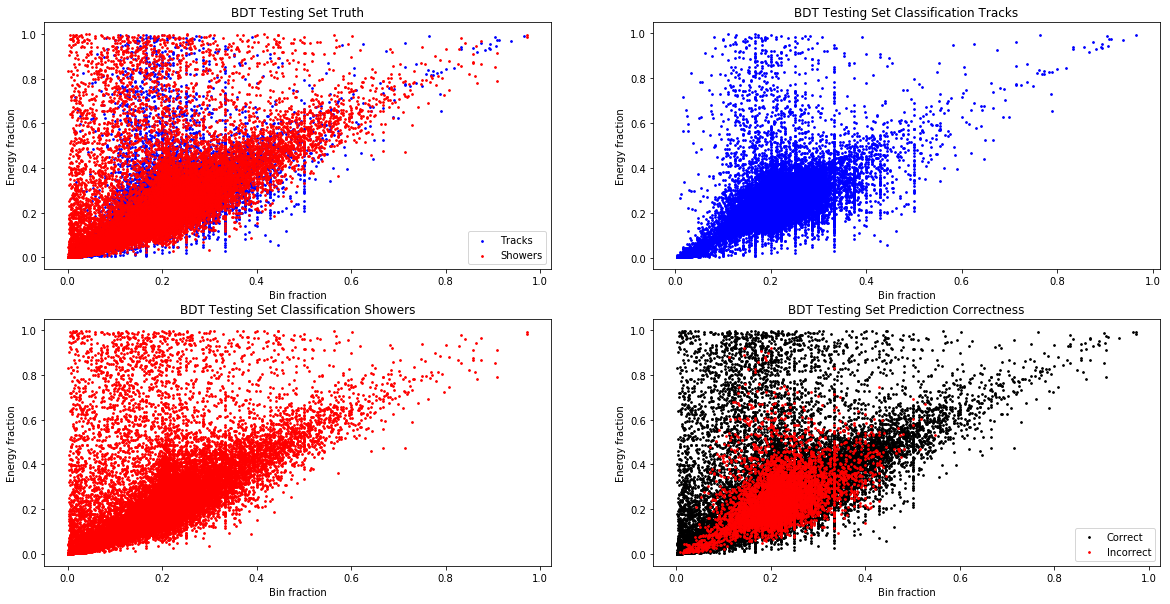

In [24]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 2], c="b", label="Tracks", s=3)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 2], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Testing Set Truth')
plt.legend()



plt.subplot(2, 2, 2)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 2], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Testing Set Classification Tracks')


plt.subplot(2, 2, 3)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 2], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title('BDT Testing Set Classification Showers')



plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_energy_test == y_test)
plt.scatter(x_test[cls_0, 1], x_test[cls_0, 2], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_energy_test != y_test)
plt.scatter(x_test[cls_1, 1], x_test[cls_1, 2], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("Energy fraction")
plt.title("BDT Testing Set Prediction Correctness")
plt.legend()
plt.show()

# Bin fraction and R squared

In [25]:
pred_bin_rsq_train = bdt.predict(x_train)

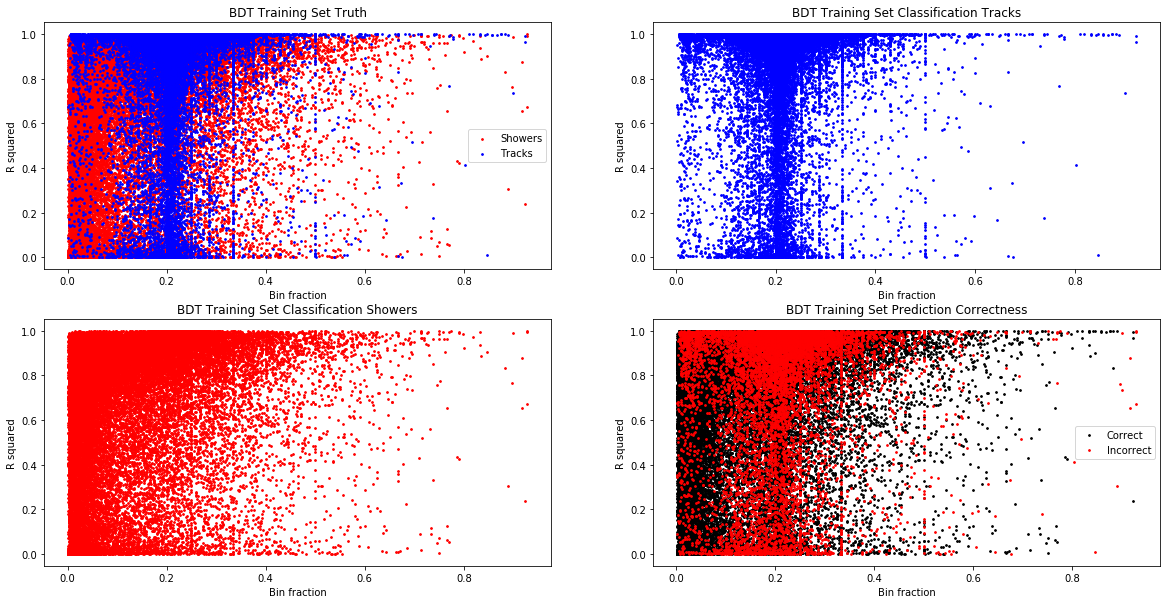

In [26]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 3], c="r", label="Showers", s=3)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 3], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Training Set Truth')
plt.legend()


plt.subplot(2, 2, 2)
plt.scatter(x_train[cls_1_train, 1], x_train[cls_1_train, 3], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Training Set Classification Tracks')

plt.subplot(2, 2, 3)
plt.scatter(x_train[cls_0_train, 1], x_train[cls_0_train, 3], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Training Set Classification Showers')


plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_rsq_train == y_train)
plt.scatter(x_train[cls_0, 1], x_train[cls_0, 3], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_rsq_train != y_train)
plt.scatter(x_train[cls_1, 1], x_train[cls_1, 3], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title("BDT Training Set Prediction Correctness")
plt.legend()
plt.show()

In [27]:
pred_bin_rsq_test = bdt.predict(x_test)

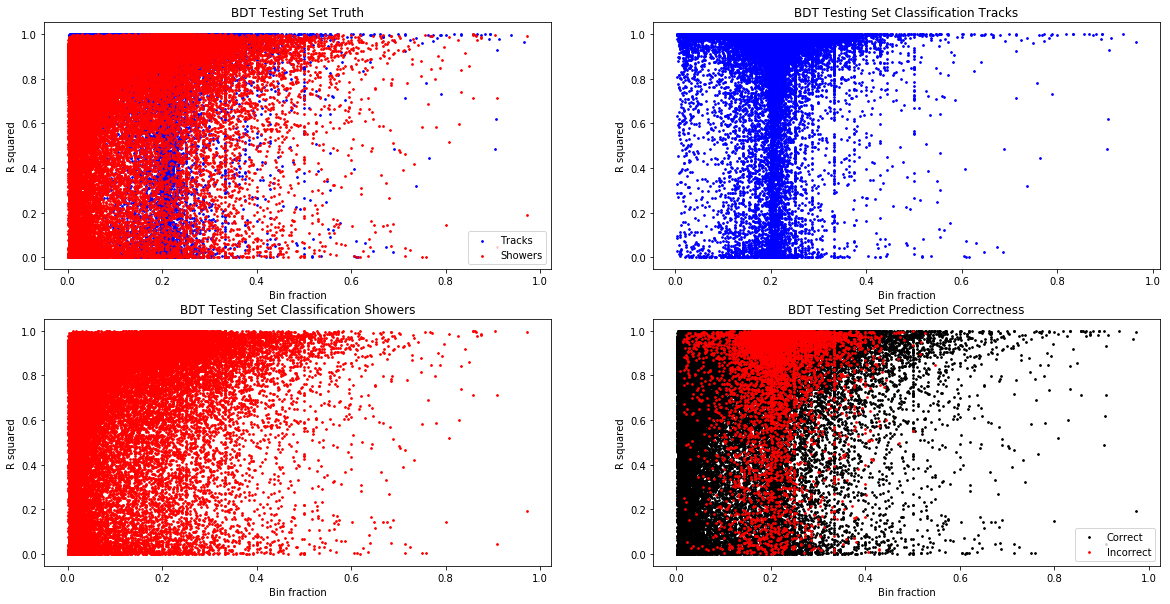

In [28]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 3], c="b", label="Tracks", s=3)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 3], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Testing Set Truth')
plt.legend()



plt.subplot(2, 2, 2)
plt.scatter(x_test[cls_1_test, 1], x_test[cls_1_test, 3], c="b", label="Tracks", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Testing Set Classification Tracks')



plt.subplot(2, 2, 3)
plt.scatter(x_test[cls_0_test, 1], x_test[cls_0_test, 3], c="r", label="Showers", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title('BDT Testing Set Classification Showers')


plt.subplot(2, 2, 4)
cls_0 = np.where(pred_bin_rsq_test == y_test)
plt.scatter(x_test[cls_0, 1], x_test[cls_0, 3], c="k", label="Correct", s=3)
cls_1 = np.where(pred_bin_rsq_test != y_test)
plt.scatter(x_test[cls_1, 1], x_test[cls_1, 3], c="r", label="Incorrect", s=3)
plt.xlabel("Bin fraction")
plt.ylabel("R squared")
plt.title("BDT Testing Set Prediction Correctness")
plt.legend()
plt.show()

# Energy fraction and angle

In [29]:
pred_energy_angle_train = bdt.predict(x_train)

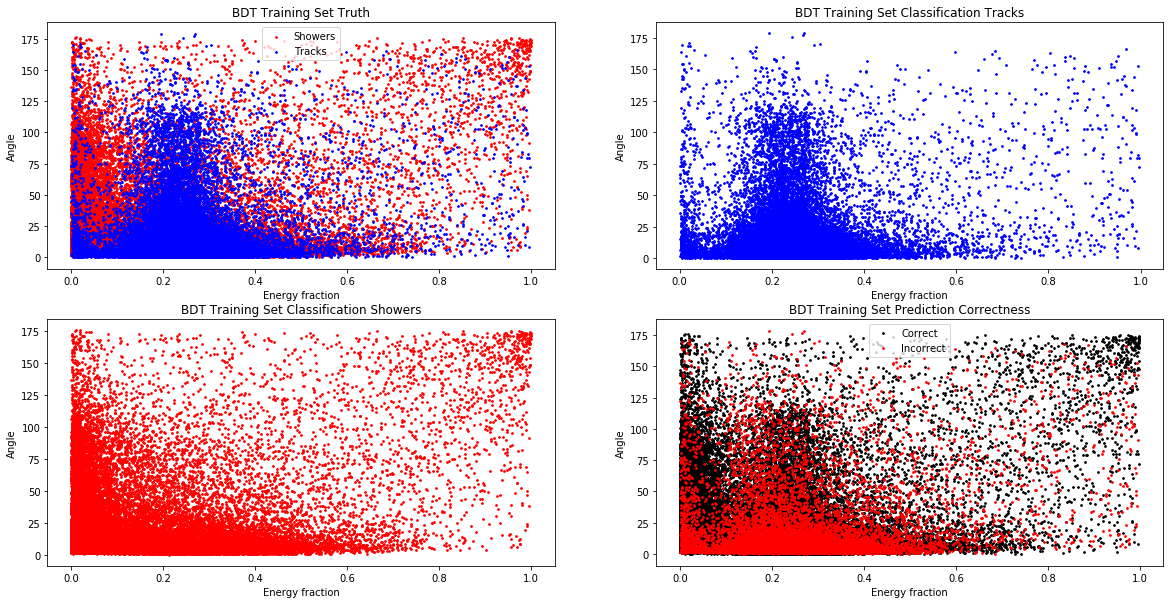

In [30]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_train[cls_0_train, 2], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.scatter(x_train[cls_1_train, 2], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Training Set Truth')
plt.legend()


plt.subplot(2, 2, 2)
plt.scatter(x_train[cls_1_train, 2], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Training Set Classification Tracks')


plt.subplot(2, 2, 3)
plt.scatter(x_train[cls_0_train, 2], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Training Set Classification Showers')

plt.subplot(2, 2, 4)
cls_0 = np.where(pred_energy_angle_train == y_train)
plt.scatter(x_train[cls_0, 2], x_train[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_energy_angle_train != y_train)
plt.scatter(x_train[cls_1, 2], x_train[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title("BDT Training Set Prediction Correctness")
plt.legend()
plt.show()

In [31]:
pred_energy_angle_test = bdt.predict(x_test)

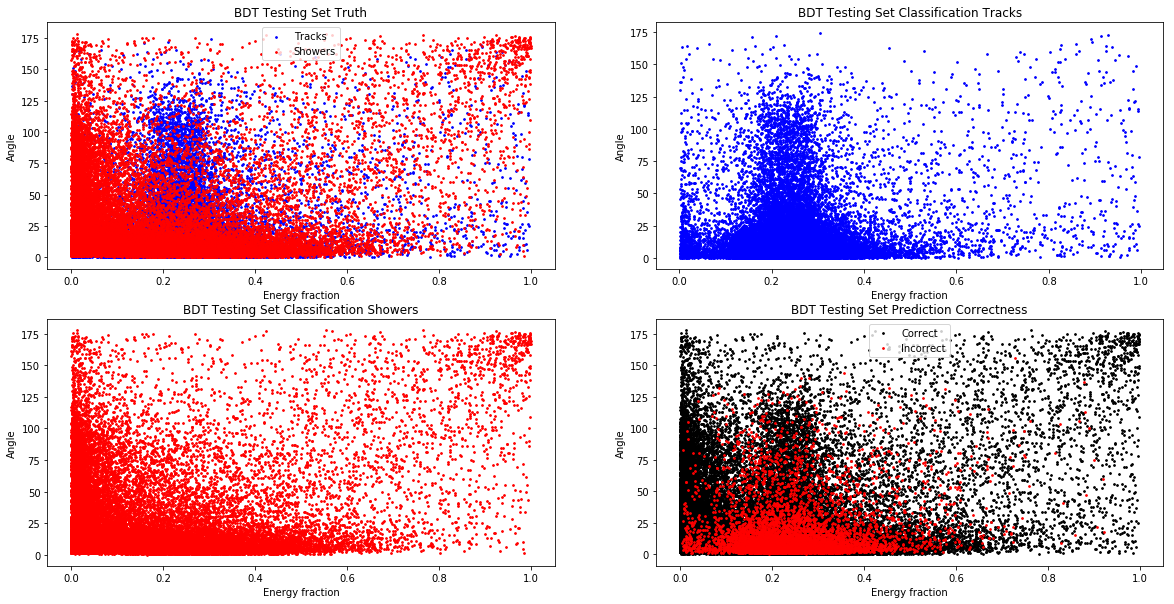

In [32]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_test[cls_1_test, 2], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.scatter(x_test[cls_0_test, 2], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Testing Set Truth')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(x_test[cls_1_test, 2], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Testing Set Classification Tracks')

plt.subplot(2, 2, 3)
plt.scatter(x_test[cls_0_test, 2], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title('BDT Testing Set Classification Showers')

plt.subplot(2, 2, 4)
cls_0 = np.where(pred_energy_angle_test == y_test)
plt.scatter(x_test[cls_0, 2], x_test[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_energy_angle_test != y_test)
plt.scatter(x_test[cls_1, 2], x_test[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title("BDT Testing Set Prediction Correctness")
plt.legend()
plt.show()

# Angle and R squared

In [33]:
pred_angle_rsq_train = bdt.predict(x_train)

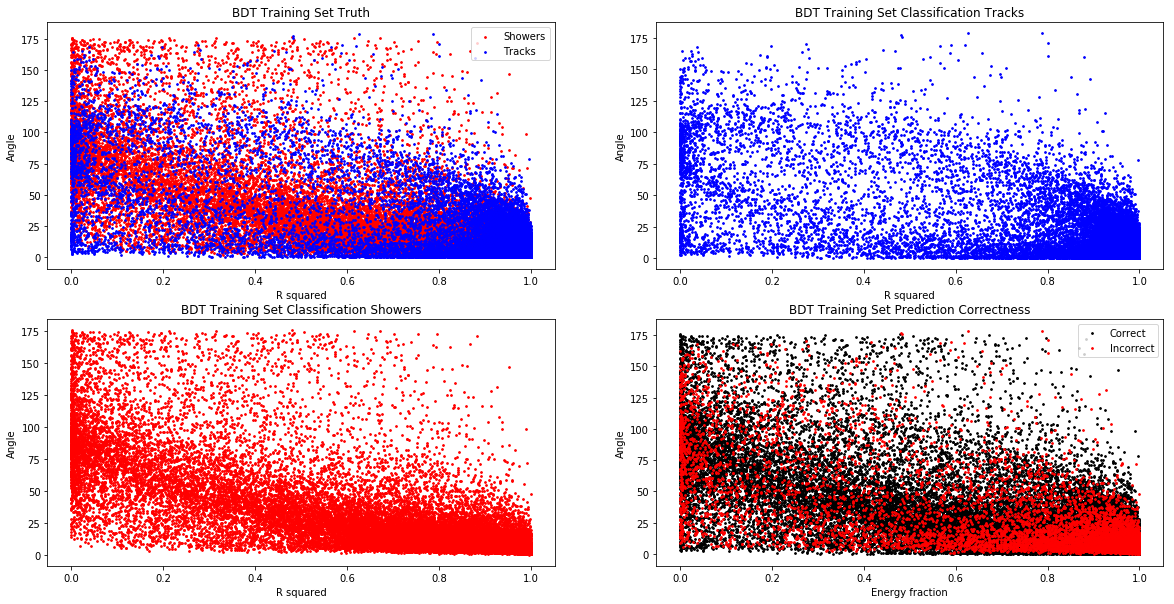

In [34]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_train[cls_0_train, 3], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.scatter(x_train[cls_1_train, 3], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Training Set Truth')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(x_train[cls_1_train, 3], x_train[cls_1_train, 0], c="b", label="Tracks", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Training Set Classification Tracks')

plt.subplot(2, 2, 3)
plt.scatter(x_train[cls_0_train, 3], x_train[cls_0_train, 0], c="r", label="Showers", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Training Set Classification Showers')

plt.subplot(2, 2, 4)
cls_0 = np.where(pred_angle_rsq_train == y_train)
plt.scatter(x_train[cls_0, 3], x_train[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_angle_rsq_train != y_train)
plt.scatter(x_train[cls_1, 3], x_train[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("Energy fraction")
plt.ylabel("Angle")
plt.title("BDT Training Set Prediction Correctness")
plt.legend()
plt.show()

In [35]:
pred_angle_rsq_test = bdt.predict(x_test)

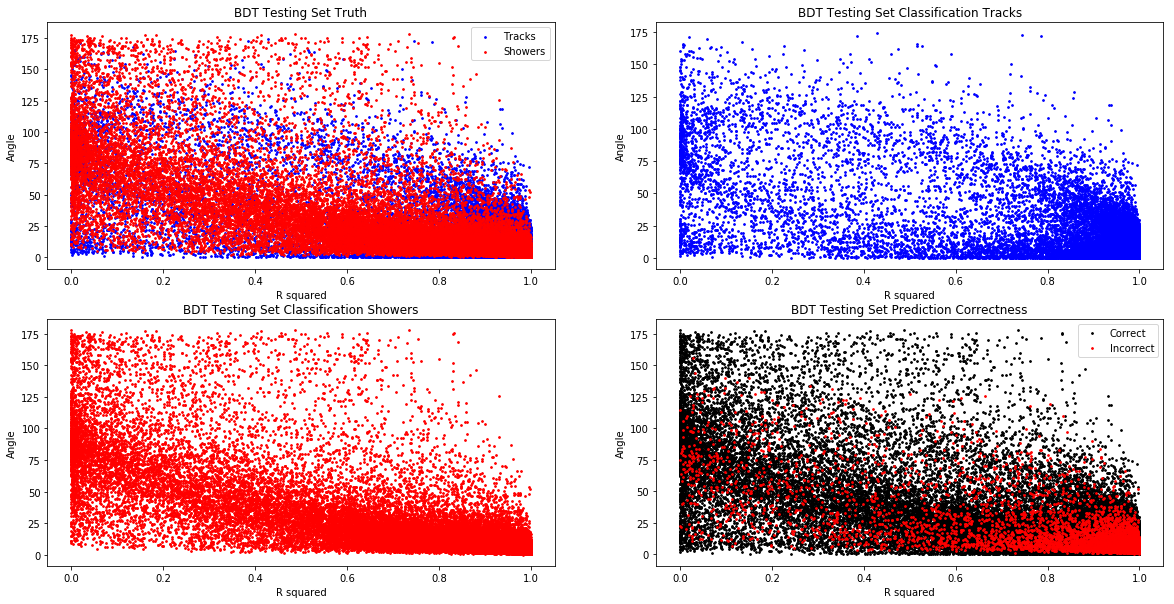

In [36]:
fig = plt.figure(1, figsize = (20,10))
plt.subplot(2, 2, 1)
plt.scatter(x_test[cls_1_test, 3], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.scatter(x_test[cls_0_test, 3], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Testing Set Truth')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(x_test[cls_1_test, 3], x_test[cls_1_test, 0], c="b", label="Tracks", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Testing Set Classification Tracks')

plt.subplot(2, 2, 3)
plt.scatter(x_test[cls_0_test, 3], x_test[cls_0_test, 0], c="r", label="Showers", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title('BDT Testing Set Classification Showers')

plt.subplot(2, 2, 4)
cls_0 = np.where(pred_angle_rsq_test == y_test)
plt.scatter(x_test[cls_0, 3], x_test[cls_0, 0], c="k", label="Correct", s=3)
cls_1 = np.where(pred_angle_rsq_test != y_test)
plt.scatter(x_test[cls_1, 3], x_test[cls_1, 0], c="r", label="Incorrect", s=3)
plt.xlabel("R squared")
plt.ylabel("Angle")
plt.title("BDT Testing Set Prediction Correctness")
plt.legend()
plt.show()

# BDT training score

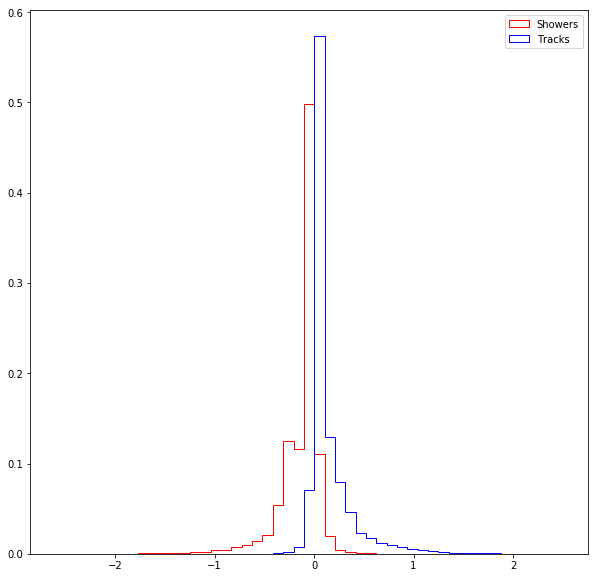

In [37]:
plt.figure(figsize = (10,10))
f_train = bdt.decision_function(x_train)
min_f_train = np.round(np.min(f_train), 1)
max_f_train = np.round(np.max(f_train), 1)
bins = np.linspace(min_f_train, max_f_train, 50)
cls_0_f_train = f_train[np.where(y_train == 0)]
cls_1_f_train = f_train[np.where(y_train == 1)]
weights_0 = np.ones_like(cls_0_f_train) / len(cls_0_f_train)
weights_1 = np.ones_like(cls_1_f_train) / len(cls_1_f_train)
plt.hist(cls_0_f_train, color='r', weights=weights_0, bins=bins, histtype='step', label='Showers')
plt.hist(cls_1_f_train, color='b', weights=weights_1, bins=bins, histtype='step', label='Tracks')
#plt.xticks(np.arange(-2, 2, 0.5))
plt.legend()
plt.savefig('bdttrackshower_train.png')
plt.show()

In [38]:
len(f_train)

117318

# BDT testing score

In [39]:
#Which one do we talk about training or testing?

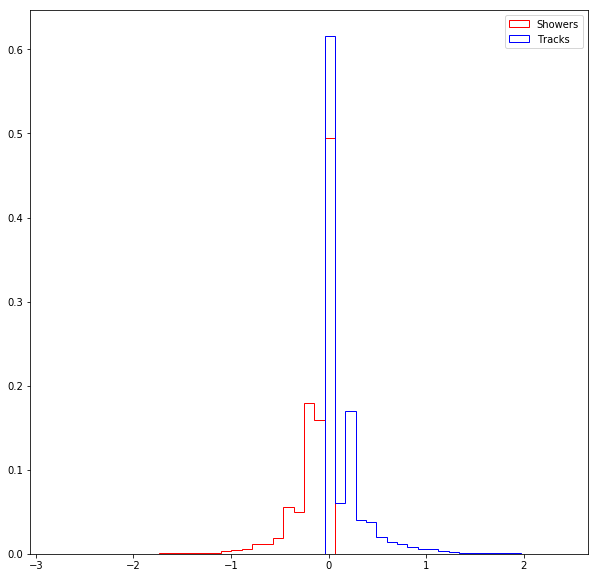

In [40]:
plt.figure(figsize = (10,10))
f_test = bdt.decision_function(x_test)
min_f_test = np.round(np.min(f_test), 1)
max_f_test = np.round(np.max(f_test), 1)
bins = np.linspace(min_f_test, max_f_test, 50)
cls_0_f_test = f_test[np.where(y_test == 0)]
cls_1_f_test = f_test[np.where(y_test == 1)]
weights_0 = np.ones_like(cls_0_f_test) / len(cls_0_f_test)
weights_1 = np.ones_like(cls_1_f_test) / len(cls_1_f_test)
plt.hist(cls_0_f_test, color='r', weights=weights_0, bins=bins, histtype='step', label='Showers')
plt.hist(cls_1_f_test, color='b', weights=weights_1, bins=bins, histtype='step', label='Tracks')
plt.savefig('bdttrackshower_test.png')
plt.legend()
plt.show()

# Track particle id

In [41]:
pionid = np.where(pdg_train == 211)[0]
muonid = np.where(pdg_train == 13)[0]
protonid = np.where(pdg_train == 2212)[0]
electronid = np.where(pdg_train == 11)[0]
photonid = np.where(pdg_train == 22)[0]
otherid1 = np.where(pdg_train == 321)[0]
otherid3 = np.where(pdg_train == 2112)[0]
otherid4 = np.where(pdg_train == 3222)[0]

In [42]:
pionid_test = np.where(pdg_test == 211)[0]
muonid_test = np.where(pdg_test == 13)[0]
protonid_test = np.where(pdg_test == 2212)[0]
electronid_test = np.where(pdg_test == 11)[0]
photonid_test = np.where(pdg_test == 22)[0]

In [43]:
otherid =  np.array(list(otherid1) + list(otherid3) + list(otherid4))

In [44]:
pionid_test = np.where(pdg_test == 211)[0]
muonid_test = np.where(pdg_test == 13)[0]
protonid_test = np.where(pdg_test == 2212)[0]
electronid_test = np.where(pdg_test == 11)[0]
photonid_test = np.where(pdg_test == 22)[0]
otherid1_test = np.where(pdg_test == 321)[0]
otherid3_test = np.where(pdg_test == 2112)[0]
otherid4_test = np.where(pdg_test == 3222)[0]

In [45]:
otherid_test =  np.array(list(otherid1_test) + list(otherid3_test) + list(otherid4_test))

In [46]:
x_train

array([[14.31261616,  0.20238095,  0.18191113,  0.99312023],
       [ 1.51185943,  0.20512821,  0.23647127,  0.97985841],
       [ 5.77915535,  0.20588235,  0.28685775,  0.99722832],
       ...,
       [ 2.36683276,  0.22028986,  0.21082538,  0.99921892],
       [ 2.46280738,  0.20036101,  0.19711588,  0.99943964],
       [ 3.43693059,  0.21428571,  0.19193022,  0.99883645]])

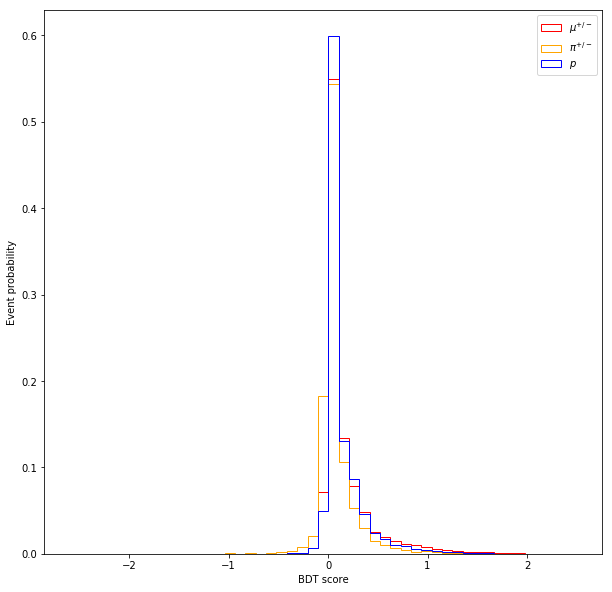

In [47]:
plt.figure(figsize = (10,10))
f = bdt.decision_function(x_train)
min_f = np.round(np.min(f), 1)
max_f = np.round(np.max(f), 1)
bins = np.linspace(min_f, max_f, 50)
cls_muon = f[muonid]
cls_pion = f[pionid]
cls_proton = f[protonid]
weights_muon = np.ones_like(cls_muon) / len(cls_muon)
weights_pion = np.ones_like(cls_pion) / len(cls_pion)
weights_proton = np.ones_like(cls_proton) / len(cls_proton)
plt.hist(cls_muon, color='r', weights=weights_muon, bins=bins, histtype='step', label=r'$\mu^{+/-}$')
plt.hist(cls_pion, color='orange', weights=weights_pion, bins=bins, histtype='step', label=r'$\pi^{+/-}$')
plt.hist(cls_proton, color='b', weights=weights_proton, bins=bins, histtype='step', label=r'$p$')
plt.xlabel('BDT score')
plt.ylabel('Event probability')
plt.legend()
plt.savefig('bdttracksdist_train.png')
plt.show()

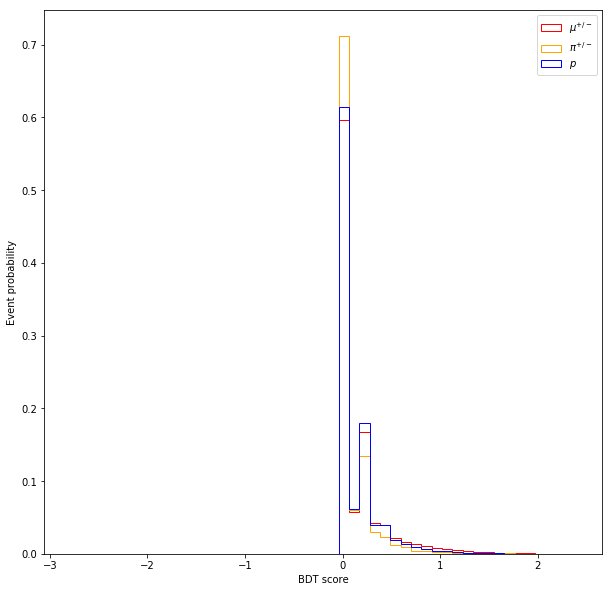

In [48]:
plt.figure(figsize = (10,10))
f = bdt.decision_function(x_test)
min_f = np.round(np.min(f), 1)
max_f = np.round(np.max(f), 1)
bins = np.linspace(min_f, max_f, 50)
cls_muon = f[muonid_test]
cls_pion = f[pionid_test]
cls_proton = f[protonid_test]
weights_muon = np.ones_like(cls_muon) / len(cls_muon)
weights_pion = np.ones_like(cls_pion) / len(cls_pion)
weights_proton = np.ones_like(cls_proton) / len(cls_proton)
plt.hist(cls_muon, color='r', weights=weights_muon, bins=bins, histtype='step', label=r'$\mu^{+/-}$')
plt.hist(cls_pion, color='orange', weights=weights_pion, bins=bins, histtype='step', label=r'$\pi^{+/-}$')
plt.hist(cls_proton, color='b', weights=weights_proton, bins=bins, histtype='step', label=r'$p$')
plt.xlabel('BDT score')
plt.ylabel('Event probability')
plt.legend()
plt.savefig('bdttracksdist_test.png')
plt.show()

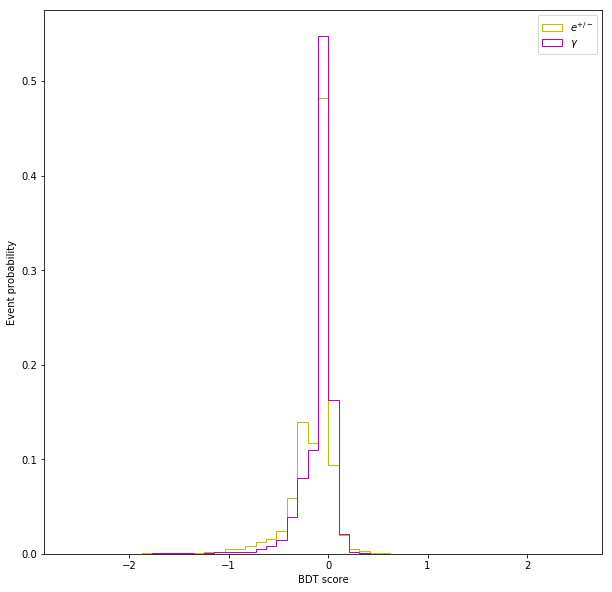

In [49]:
plt.figure(figsize = (10,10))
f = bdt.decision_function(x_train)
min_f = np.round(np.min(f), 1)
max_f = np.round(np.max(f), 1)
bins = np.linspace(min_f, max_f, 50)
cls_electron = f[electronid]
cls_photon = f[photonid]
weights_electron = np.ones_like(cls_electron) / len(cls_electron)
weights_photon = np.ones_like(cls_photon) / len(cls_photon)
plt.hist(cls_electron, color='y', weights=weights_electron, bins=bins, histtype='step', label = r'$e^{+/-}$')
plt.hist(cls_photon, color='m', weights=weights_photon, bins=bins, histtype='step', label = r'$\gamma$')
plt.xlabel('BDT score')
plt.ylabel('Event probability')
plt.legend()
plt.savefig('bdtshowersdist_train.png')
plt.show()

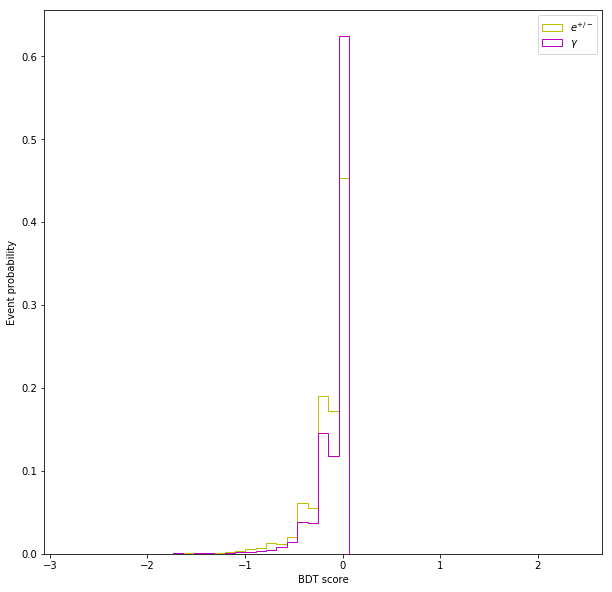

In [50]:
plt.figure(figsize = (10,10))
f = bdt.decision_function(x_test)
min_f = np.round(np.min(f), 1)
max_f = np.round(np.max(f), 1)
bins = np.linspace(min_f, max_f, 50)
cls_electron = f[electronid_test]
cls_photon = f[photonid_test]
weights_electron = np.ones_like(cls_electron) / len(cls_electron)
weights_photon = np.ones_like(cls_photon) / len(cls_photon)
plt.hist(cls_electron, color='y', weights=weights_electron, bins=bins, histtype='step', label = r'$e^{+/-}$')
plt.hist(cls_photon, color='m', weights=weights_photon, bins=bins, histtype='step', label = r'$\gamma$')
plt.xlabel('BDT score')
plt.ylabel('Event probability')
plt.legend()
plt.savefig('bdtshowersdist_test.png')
plt.show()

In [51]:
correct_muon = np.where((pdg_test == 13) & (f_test > 0))[0]
correct_pion = np.where((pdg_test == 211) & (f_test > 0))[0]
correct_proton = np.where((pdg_test == 2212) & (f_test > 0))[0]
misId_muon = np.where((pdg_test == 13) & (f_test < 0))[0]
misId_pion = np.where((pdg_test == 211) & (f_test < 0))[0]
misId_proton = np.where((pdg_test == 2212) & (f_test < 0))[0]

In [52]:
truemuontrack = np.where((pdg_test == 13) & (testisTrack == 1))[0]
truepiontrack = np.where((pdg_test == 211) & (testisTrack == 1))[0]
trueprotontrack = np.where((pdg_test == 2212) & (testisTrack == 1))[0]

In [53]:
truemuontrack_test = np.where((pdg_test == 13) & (testisTrack == 1))[0]
truepiontrack_test = np.where((pdg_test == 211) & (testisTrack == 1))[0]
trueprotontrack_test = np.where((pdg_test == 2212) & (testisTrack == 1))[0]

In [54]:
correct_muon_test = np.where((pdg_test == 13) & (f_test > 0))[0]
correct_pion_test = np.where((pdg_test == 211) & (f_test > 0))[0]
correct_proton_test = np.where((pdg_test == 2212) & (f_test > 0))[0]
misId_muon_test = np.where((pdg_test == 13) & (f_test < 0))[0]
misId_pion_test = np.where((pdg_test == 211) & (f_test < 0))[0]
misId_proton_test = np.where((pdg_test == 2212) & (f_test < 0))[0]

In [55]:
muon_efficiency_test = len(correct_muon) / len(truemuontrack)
print(muon_efficiency_test)

0.9625786646201074


In [56]:
pion_efficiency_test = len(correct_pion) / len(truepiontrack)
print(pion_efficiency_test)

0.8943860168863872


In [57]:
proton_efficiency_test = len(correct_proton) / len(trueprotontrack)
print(proton_efficiency_test)

0.9776967390729877


In [58]:
muon_efficiency_test = len(correct_muon_test) / len(truemuontrack_test)
print(muon_efficiency_test)

0.9625786646201074


In [59]:
pion_efficiency_test = len(correct_pion_test) / len(truepiontrack_test)
print(pion_efficiency_test)

0.8943860168863872


In [60]:
proton_efficiency_test = len(correct_proton_test) / len(trueprotontrack_test)
print(proton_efficiency_test)

0.9776967390729877


# Muon identified as track/shower train

In [61]:
wirePos_test = np.load('test_wirePos.npy')
driftPos_test = np.load('test_driftPos.npy')

In [62]:
correct_muon[:50]

array([  3,   5,   7,   8,  10,  12,  13,  15,  16,  17,  19,  20,  21,
        22,  24,  25,  27,  28,  29,  30,  31,  33,  35,  36,  37,  38,
        40,  42,  45,  46,  49,  52,  55,  56,  59,  63,  65,  67,  68,
        71,  72,  77,  78,  81,  82,  86,  87,  88,  90, 111], dtype=int64)

In [63]:
misId_muon[:50]

array([  61,  238,  260,  608,  674,  787,  790,  800,  827,  834,  847,
        971, 1057, 1087, 1222, 1658, 1750, 1905, 2076, 2084, 2245, 2273,
       2297, 2343, 2448, 2792, 2867, 2916, 2917, 3314, 3431, 3485, 3515,
       3575, 3649, 3707, 3798, 3886, 3963, 3990, 4038, 4063, 4077, 4140,
       4185, 4186, 4196, 4318, 4327, 4341], dtype=int64)

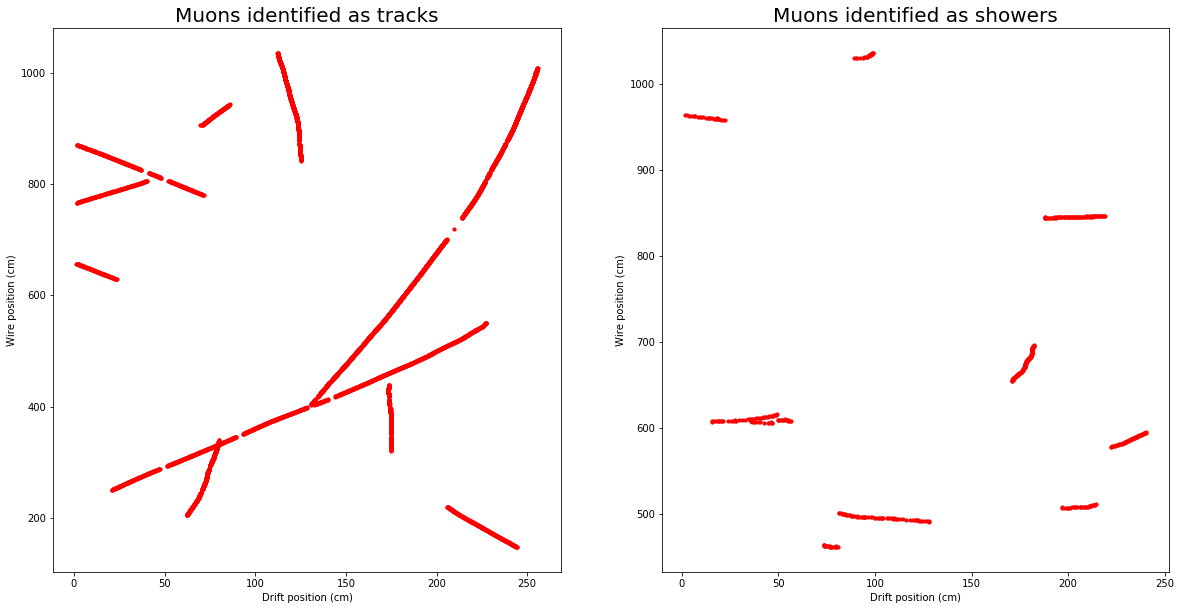

In [64]:
plt.figure(1,figsize=(20,10))
plt.subplot(1, 2, 1) 
plt.scatter(np.concatenate(driftPos_test[correct_muon[:10]]), np.concatenate(wirePos_test[correct_muon[:10]]), color = 'r', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Muons identified as tracks', fontsize = 20)
plt.subplot(1, 2, 2) 
plt.scatter(np.concatenate(driftPos_test[misId_muon[:10]]), np.concatenate(wirePos_test[misId_muon[:10]]), color = 'r', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Muons identified as showers', fontsize = 20)
plt.savefig('muoneventdisplay_test.png')
plt.show()

# Pion identified as track/shower train

In [65]:
correct_pion[:50]

array([  1,  89, 101, 124, 132, 168, 217, 224, 299, 351, 356, 381, 390,
       400, 408, 413, 416, 418, 436, 462, 475, 498, 528, 542, 550, 552,
       573, 586, 607, 620, 625, 632, 655, 681, 689, 706, 716, 738, 746,
       784, 786, 789, 795, 801, 820, 893, 926, 931, 947, 970], dtype=int64)

In [66]:
misId_pion[:50]

array([ 127,  539,  588,  619,  654,  886,  958, 1132, 2093, 2096, 2933,
       3383, 3845, 3948, 4502, 4578, 4763, 5141, 5283, 5309, 5403, 5500,
       5545, 5929, 5990, 5995, 6038, 6063, 6205, 6252, 6271, 6289, 6430,
       6527, 6644, 6817, 7229, 7503, 7556, 7700, 7807, 7883, 8111, 8239,
       8343, 8387, 8455, 8475, 8478, 8640], dtype=int64)

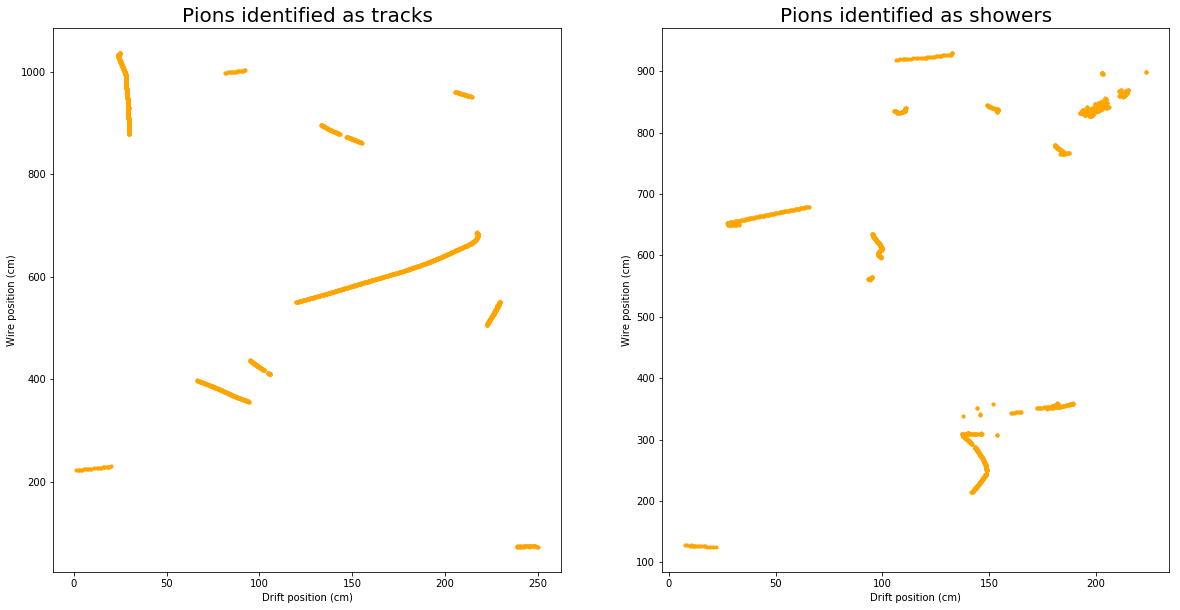

In [67]:
plt.figure(1,figsize=(20,10))
plt.subplot(1, 2, 1) 
plt.scatter(np.concatenate(driftPos_test[correct_pion[:10]]), np.concatenate(wirePos_test[correct_pion[:10]]), color = 'orange', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Pions identified as tracks', fontsize = 20)
plt.subplot(1, 2, 2) 
plt.scatter(np.concatenate(driftPos_test[misId_pion[:10]]), np.concatenate(wirePos_test[misId_pion[:10]]), color = 'orange', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Pions identified as showers', fontsize = 20)
plt.savefig('pioneventdisplay_test.png')
plt.show()

# Proton identified as track/shower train

In [68]:
correct_proton[:50]

array([  6,   9,  11,  14,  18,  23,  26,  32,  34,  39,  41,  47,  48,
        50,  51,  53,  54,  57,  58,  60,  62,  64,  66,  70,  73,  74,
        75,  76,  79,  83,  84,  85,  92,  94,  96,  97, 100, 103, 105,
       106, 108, 109, 114, 117, 120, 123, 134, 136, 137, 138], dtype=int64)

In [69]:
misId_proton[:50]

array([ 248,  316,  392,  490,  704,  830, 1071, 1083, 1091, 1165, 1238,
       1350, 1520, 1622, 1701, 1793, 1847, 1866, 1959, 2027, 2031, 2330,
       2373, 2466, 2475, 2506, 2680, 2694, 2754, 2830, 2876, 2984, 3068,
       3360, 3361, 3442, 3473, 3659, 3826, 3849, 4173, 4267, 4466, 4531,
       4649, 4814, 4855, 4915, 5129, 5220], dtype=int64)

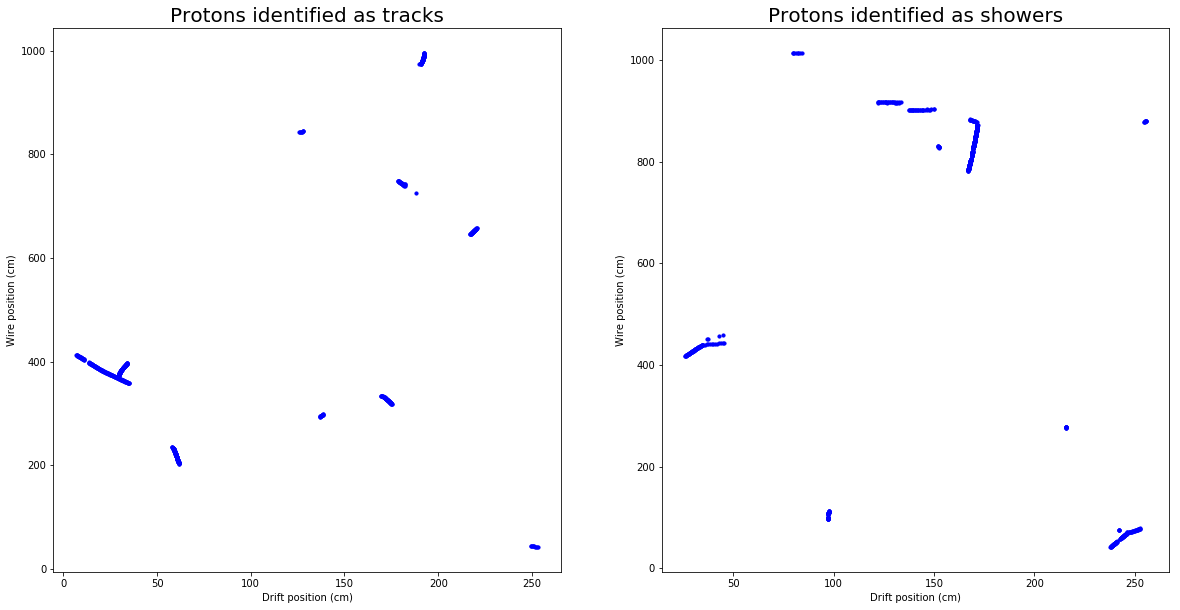

In [70]:
plt.figure(1,figsize=(20,10))
plt.subplot(1, 2, 1) 
plt.scatter(np.concatenate(driftPos_test[correct_proton[:10]]), np.concatenate(wirePos_test[correct_proton[:10]]), color = 'blue', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Protons identified as tracks', fontsize = 20)
plt.subplot(1, 2, 2) 
plt.scatter(np.concatenate(driftPos_test[misId_proton[:10]]), np.concatenate(wirePos_test[misId_proton[:10]]), color = 'blue', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Protons identified as showers', fontsize = 20)
plt.savefig('protoneventdisplay_test.png')
plt.show()

In [71]:
#BDT score for first 10 PFOs
bdt.decision_function(x_train[0:10])

array([0.37801061, 0.01164986, 0.21488573, 0.19891904, 0.00778696,
       0.63503032, 0.02556032, 0.01257493, 0.01147607, 0.03334571])

In [72]:
bdt.classes_

array([0, 1])

In [73]:
x_train[0:10]

array([[14.31261616,  0.20238095,  0.18191113,  0.99312023],
       [ 1.51185943,  0.20512821,  0.23647127,  0.97985841],
       [ 5.77915535,  0.20588235,  0.28685775,  0.99722832],
       [ 3.9622589 ,  0.20361991,  0.19752915,  0.99924021],
       [10.47261009,  0.2       ,  0.20961988,  0.97527337],
       [ 0.28258897,  0.20207254,  0.20975031,  0.99929928],
       [ 1.19816943,  0.2027027 ,  0.28251779,  0.97751188],
       [12.18027899,  0.20418848,  0.18020302,  0.9976379 ],
       [21.80751889,  0.28571429,  0.25823331,  0.99523671],
       [ 3.59220858,  0.20689655,  0.18573666,  0.99954574]])

In [143]:
cutpositions = np.linspace(-0.1,0.1,500)
truepositives = []
falsepositives = []
for i in range(len(cutpositions)):
    cut = cutpositions[i]
    numtruepositives = len(np.where(cls_1_f_test > cut)[0])
    numfalsepositives = len(np.where(cls_0_f_test > cut)[0])
    truepositives.append(numtruepositives)
    falsepositives.append(numfalsepositives)
truepositives = np.array(truepositives)/len(cls_1_f_test)
falsepositives = np.array(falsepositives)/len(cls_1_f_test)

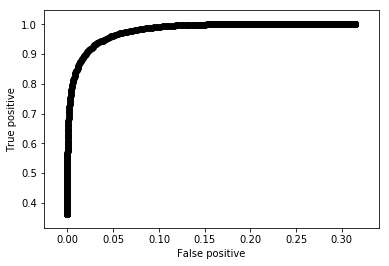

In [144]:
plt.scatter(falsepositives,truepositives, c = 'k')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.savefig('bdtroccurve.png')
plt.show()

In [145]:
distfromtopleft = (1-truepositives)**2 + falsepositives**2
optimalcutindex = np.where(distfromtopleft == distfromtopleft.min())
optimalcut = cutpositions[optimalcutindex]

In [146]:
optimalcut

array([0.0006012])

In [147]:
f_test.max()

2.372475702013192

In [79]:
trainangles_pions = trainangles[pionid]
trainangles_muons = trainangles[muonid]
trainangles_protons = trainangles[protonid]
trainangles_other = trainangles[otherid]
trainenergy_pions = trainenergy[pionid]
trainenergy_muons = trainenergy[muonid]
trainenergy_protons = trainenergy[protonid]
trainenergy_other = trainenergy[otherid]
trainbinfrac_pions = trainbinfrac[pionid]
trainbinfrac_muons = trainbinfrac[muonid]
trainbinfrac_protons = trainbinfrac[protonid]
trainbinfrac_other = trainbinfrac[otherid]
trainrsq_pions = trainrsq[pionid]
trainrsq_muons = trainrsq[muonid]
trainrsq_protons = trainrsq[protonid]
trainrsq_other = trainrsq[otherid]

In [80]:
testangles_pions = testangles[pionid_test]
testangles_muons = testangles[muonid_test]
testangles_protons = testangles[protonid_test]
testangles_other = testangles[otherid_test]
testenergy_pions = testenergy[pionid_test]
testenergy_muons = testenergy[muonid_test]
testenergy_protons = testenergy[protonid_test]
testenergy_other = testenergy[otherid_test]
testbinfrac_pions = testbinfrac[pionid_test]
testbinfrac_muons = testbinfrac[muonid_test]
testbinfrac_protons = testbinfrac[protonid_test]
testbinfrac_other = testbinfrac[otherid_test]
testrsq_pions = testrsq[pionid_test]
testrsq_muons = testrsq[muonid_test]
testrsq_protons = testrsq[protonid_test]
testrsq_other = testrsq[otherid_test]

In [81]:
trainangles_pions_tracks = []
trainangles_muons_tracks = []
trainangles_protons_tracks = []
trainangles_other_tracks = []
trainenergy_pions_tracks = []
trainenergy_muons_tracks = []
trainenergy_protons_tracks = []
trainenergy_other_tracks = []
trainbinfrac_pions_tracks = []
trainbinfrac_muons_tracks = []
trainbinfrac_protons_tracks = []
trainbinfrac_other_tracks = []
trainrsq_pions_tracks = []
trainrsq_muons_tracks = []
trainrsq_protons_tracks = []
trainrsq_other_tracks = []

for i in range(len(trainangles_pions)):
    if f_train[i] > 0:
        trainangles_pions_tracks.append(trainangles_pions[i])
        
for i in range(len(trainangles_muons)):
    if f_train[i] > 0:
        trainangles_muons_tracks.append(trainangles_muons[i])
        
for i in range(len(trainangles_protons)):
    if f_train[i] > 0:
        trainangles_protons_tracks.append(trainangles_protons[i])
        
for i in range(len(trainangles_other)):
    if f_train[i] > 0:
        trainangles_other_tracks.append(trainangles_other[i])
        
for i in range(len(trainenergy_pions)):
    if f_train[i] > 0:
        trainenergy_pions_tracks.append(trainenergy_pions[i])
        
for i in range(len(trainenergy_muons)):
    if f_train[i] > 0:
        trainenergy_muons_tracks.append(trainenergy_muons[i])
        
for i in range(len(trainenergy_protons)):
    if f_train[i] > 0:
        trainenergy_protons_tracks.append(trainenergy_protons[i])

for i in range(len(trainenergy_other)):
    if f_train[i] > 0:
        trainenergy_other_tracks.append(trainenergy_other[i])
        
for i in range(len(trainbinfrac_pions)):
    if f_train[i] > 0:
        trainbinfrac_pions_tracks.append(trainbinfrac_pions[i])
        
for i in range(len(trainbinfrac_muons)):
    if f_train[i] > 0:
        trainbinfrac_muons_tracks.append(trainbinfrac_muons[i])
        
for i in range(len(trainbinfrac_protons)):
    if f_train[i] > 0:
        trainbinfrac_protons_tracks.append(trainbinfrac_protons[i])
        
for i in range(len(trainbinfrac_other)):
    if f_train[i] > 0:
        trainbinfrac_other_tracks.append(trainbinfrac_other[i])
        
for i in range(len(trainrsq_pions)):
    if f_train[i] > 0:
        trainrsq_pions_tracks.append(trainrsq_pions[i])
        
for i in range(len(trainrsq_muons)):
    if f_train[i] > 0:
        trainrsq_muons_tracks.append(trainrsq_muons[i])
        
for i in range(len(trainrsq_protons)):
    if f_train[i] > 0:
        trainrsq_protons_tracks.append(trainrsq_protons[i])
        
for i in range(len(trainrsq_other)):
    if f_train[i] > 0:
        trainrsq_other_tracks.append(trainrsq_other[i])     

In [82]:
testangles_pions_tracks = []
testangles_muons_tracks = []
testangles_protons_tracks = []
testangles_other_tracks = []
testenergy_pions_tracks = []
testenergy_muons_tracks = []
testenergy_protons_tracks = []
testenergy_other_tracks = []
testbinfrac_pions_tracks = []
testbinfrac_muons_tracks = []
testbinfrac_protons_tracks = []
testbinfrac_other_tracks = []
testrsq_pions_tracks = []
testrsq_muons_tracks = []
testrsq_protons_tracks = []
testrsq_other_tracks = []

for i in range(len(testangles_pions)):
    if f_test[i] > 0:
        testangles_pions_tracks.append(testangles_pions[i])
        
for i in range(len(testangles_muons)):
    if f_test[i] > 0:
        testangles_muons_tracks.append(testangles_muons[i])
        
for i in range(len(testangles_protons)):
    if f_test[i] > 0:
        testangles_protons_tracks.append(testangles_protons[i])
        
for i in range(len(testangles_other)):
    if f_test[i] > 0:
        testangles_other_tracks.append(testangles_other[i])
        
for i in range(len(testenergy_pions)):
    if f_test[i] > 0:
        testenergy_pions_tracks.append(testenergy_pions[i])
        
for i in range(len(testenergy_muons)):
    if f_test[i] > 0:
        testenergy_muons_tracks.append(testenergy_muons[i])
        
for i in range(len(testenergy_protons)):
    if f_test[i] > 0:
        testenergy_protons_tracks.append(testenergy_protons[i])

for i in range(len(testenergy_other)):
    if f_test[i] > 0:
        testenergy_other_tracks.append(testenergy_other[i])
        
for i in range(len(testbinfrac_pions)):
    if f_test[i] > 0:
        testbinfrac_pions_tracks.append(testbinfrac_pions[i])
        
for i in range(len(testbinfrac_muons)):
    if f_test[i] > 0:
        testbinfrac_muons_tracks.append(testbinfrac_muons[i])
        
for i in range(len(testbinfrac_protons)):
    if f_test[i] > 0:
        testbinfrac_protons_tracks.append(testbinfrac_protons[i])
        
for i in range(len(testbinfrac_other)):
    if f_test[i] > 0:
        testbinfrac_other_tracks.append(testbinfrac_other[i])
        
for i in range(len(testrsq_pions)):
    if f_test[i] > 0:
        testrsq_pions_tracks.append(testrsq_pions[i])
        
for i in range(len(testrsq_muons)):
    if f_test[i] > 0:
        testrsq_muons_tracks.append(testrsq_muons[i])
        
for i in range(len(testrsq_protons)):
    if f_test[i] > 0:
        testrsq_protons_tracks.append(testrsq_protons[i])
        
for i in range(len(testrsq_other)):
    if f_test[i] > 0:
        testrsq_other_tracks.append(testrsq_other[i])     

In [83]:
trainangles_pions_t = np.array(trainangles_pions_tracks)
trainangles_muons_t = np.array(trainangles_muons_tracks)
trainangles_protons_t = np.array(trainangles_protons_tracks)
trainangles_other_t = np.array(trainangles_other_tracks)
trainenergy_pions_t = np.array(trainenergy_pions_tracks)
trainenergy_muons_t = np.array(trainenergy_muons_tracks)
trainenergy_protons_t = np.array(trainenergy_protons_tracks)
trainenergy_other_t = np.array(trainenergy_other_tracks)
trainbinfrac_pions_t = np.array(trainbinfrac_pions_tracks)
trainbinfrac_muons_t = np.array(trainbinfrac_muons_tracks)
trainbinfrac_protons_t = np.array(trainbinfrac_protons_tracks)
trainbinfrac_other_t = np.array(trainbinfrac_other_tracks)
trainrsq_pions_t = np.array(trainrsq_pions_tracks)
trainrsq_muons_t = np.array(trainrsq_muons_tracks)
trainrsq_protons_t = np.array(trainrsq_protons_tracks)
trainrsq_other_t = np.array(trainrsq_other_tracks)

In [84]:
testangles_pions_t = np.array(testangles_pions_tracks)
testangles_muons_t = np.array(testangles_muons_tracks)
testangles_protons_t = np.array(testangles_protons_tracks)
testangles_other_t = np.array(testangles_other_tracks)
testenergy_pions_t = np.array(testenergy_pions_tracks)
testenergy_muons_t = np.array(testenergy_muons_tracks)
testenergy_protons_t = np.array(testenergy_protons_tracks)
testenergy_other_t = np.array(testenergy_other_tracks)
testbinfrac_pions_t = np.array(testbinfrac_pions_tracks)
testbinfrac_muons_t = np.array(testbinfrac_muons_tracks)
testbinfrac_protons_t = np.array(testbinfrac_protons_tracks)
testbinfrac_other_t = np.array(testbinfrac_other_tracks)
testrsq_pions_t = np.array(testrsq_pions_tracks)
testrsq_muons_t = np.array(testrsq_muons_tracks)
testrsq_protons_t = np.array(testrsq_protons_tracks)
testrsq_other_t = np.array(testrsq_other_tracks)

In [85]:
np.save('trainangles_pions_t.npy', trainangles_pions_t)
np.save('trainangles_muons_t.npy', trainangles_muons_t) 
np.save('trainangles_protons_t.npy', trainangles_protons_t)
np.save('trainangles_other_t.npy', trainangles_other_t)
np.save('trainenergy_pions_t.npy', trainenergy_pions_t) 
np.save('trainenergy_muons_t.npy', trainenergy_muons_t)
np.save('trainenergy_protons_t.npy', trainenergy_protons_t)
np.save('trainenergy_other_t.npy', trainenergy_other_t)
np.save('trainbinfrac_pions_t.npy', trainbinfrac_pions_t) 
np.save('trainbinfrac_muons_t.npy', trainbinfrac_muons_t)
np.save('trainbinfrac_protons_t.npy', trainbinfrac_protons_t)
np.save('trainbinfrac_other_t.npy', trainbinfrac_other_t)
np.save('trainrsq_pions_t.npy', trainrsq_pions_t) 
np.save('trainrsq_muons_t.npy', trainrsq_muons_t) 
np.save('trainrsq_protons_t.npy', trainrsq_protons_t) 
np.save('trainrsq_other_t.npy', trainrsq_other_t)

In [86]:
np.save('testangles_pions_t.npy', testangles_pions_t)
np.save('testangles_muons_t.npy', testangles_muons_t) 
np.save('testangles_protons_t.npy', testangles_protons_t)
np.save('testangles_other_t.npy', testangles_other_t)
np.save('testenergy_pions_t.npy', testenergy_pions_t) 
np.save('testenergy_muons_t.npy', testenergy_muons_t)
np.save('testenergy_protons_t.npy', testenergy_protons_t)
np.save('testenergy_other_t.npy', testenergy_other_t)
np.save('testbinfrac_pions_t.npy', testbinfrac_pions_t) 
np.save('testbinfrac_muons_t.npy', testbinfrac_muons_t)
np.save('testbinfrac_protons_t.npy', testbinfrac_protons_t)
np.save('testbinfrac_other_t.npy', testbinfrac_other_t)
np.save('testrsq_pions_t.npy', testrsq_pions_t) 
np.save('testrsq_muons_t.npy', testrsq_muons_t) 
np.save('testrsq_protons_t.npy', testrsq_protons_t) 
np.save('testrsq_other_t.npy', testrsq_other_t)

In [104]:
tracks_train = np.where(f_train > 0)[0]
tracks_test = np.where(f_test > 0)[0]
showers_test = np.where(f_test < 0)[0]

In [114]:
truetracks_test = np.where(testisTrack == 1 )[0]
trueshowers_test = np.where(testisTrack == 0 )[0]

In [88]:
trainangles_tracks = trainangles[tracks_train]
trainenergy_tracks = trainenergy[tracks_train]
trainbinfrac_tracks= trainbinfrac[tracks_train]
trainrsq_tracks = trainrsq[tracks_train]

In [89]:
testangles_tracks = testangles[tracks_test]
testenergy_tracks = testenergy[tracks_test]
testbinfrac_tracks = testbinfrac[tracks_test]
testrsq_tracks = testrsq[tracks_test]

In [90]:
#Variables values with bdt score > 0
np.save('trainangles_t.npy', trainangles_tracks)
np.save('trainenergy_t.npy', trainenergy_tracks)
np.save('trainbinfrac_t.npy', trainbinfrac_tracks)
np.save('trainrsq_t.npy', trainrsq_tracks)

In [91]:
np.save('testangles_t.npy', testangles_tracks)
np.save('testenergy_t.npy', testenergy_tracks)
np.save('testbinfrac_t.npy', testbinfrac_tracks)
np.save('testrsq_t.npy', testrsq_tracks)

In [92]:
cls_1_f_test

array([0.20076753, 0.12883756, 0.28364802, ..., 0.13975643, 0.02669878,
       0.01851798])

# BDT assessment

In [148]:
trackscalledtracks = len(np.where(cls_1_f_test > optimalcut)[0])
trackscalledshowers = len(np.where(cls_1_f_test < optimalcut)[0])
showerscalledtracks = len(np.where(cls_0_f_test > optimalcut)[0])
showerscalledshowers = len(np.where(cls_0_f_test < optimalcut)[0])

In [155]:
accuracy = ((trackscalledtracks) + (showerscalledshowers)) / (len(truetracks_test) + len(trueshowers_test))
accuracy

0.9415784050406257

In [149]:
purity = trackscalledtracks / ((trackscalledtracks) + (showerscalledtracks))
purity

0.9522926457513019

In [150]:
completeness = (trackscalledtracks)/((trackscalledtracks) + (trackscalledshowers))
completeness

0.9595443783195751

In [157]:
uncertainty = (completeness * (1 - completeness)) / len(truetracks_test)
uncertainty

4.968191508910893e-07

In [151]:
completeness_shower = (showerscalledshowers)/((showerscalledshowers) + (showerscalledtracks))
completeness_shower

0.9067133596602339

In [152]:
purity_shower = showerscalledshowers / ((showerscalledshowers) + (trackscalledshowers))
purity_shower

0.920313602904104